In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

### Percentage of missing data 

In [130]:
df.isnull().mean()

Survived        0.0
Age             0.0
Fare            0.0
Age_end_dist    0.0
dtype: float64

###### Random Sampling imputation

In [17]:
df['Age'].dropna().sample()

54    65.0
Name: Age, dtype: float64

In [18]:
df['Age'].dropna().sample(3)

349    42.0
263    40.0
764    16.0
Name: Age, dtype: float64

In [39]:
random_samp = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)  #since we want 177 values to be put into the missing values

In [86]:
#random_samp

In [87]:
random_samp.iloc[1]

50.0

In [88]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0) 
    #print(random_sample)
    random_sample.index = df[df[variable].isnull()].index      #look krish github notebook for clarification
    df.loc[ df[variable].isnull() , variable + '_random'] = random_sample
    #i=0
#     for index in missing_index:
#         df.loc[index, variable+'_random'] = random_sample.iloc[i]       #this also worked 
#         i+=1

In [89]:
missing_index = df[df['Age'].isnull()].index

In [90]:
print(type(missing_index))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [91]:
missing_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [92]:
# for index in missing_index:
#     pass

In [93]:
impute_nan(df, 'Age', 25)

In [82]:
df.head(25)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,25.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [94]:
df.loc[df['Age'].isnull()].head(10)

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,25.0,28.00
17,1,NaN,13.0000,25.0,50.00
19,1,NaN,7.2250,25.0,0.92
26,0,NaN,7.2250,25.0,36.00
28,1,NaN,7.8792,25.0,26.00
29,0,NaN,7.8958,25.0,36.00
31,1,NaN,146.5208,25.0,31.00
32,1,NaN,7.7500,25.0,65.00
36,1,NaN,7.2292,25.0,65.00
42,0,NaN,7.8958,25.0,47.00


In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'DataFrame' object has no attribute 'Age_random'

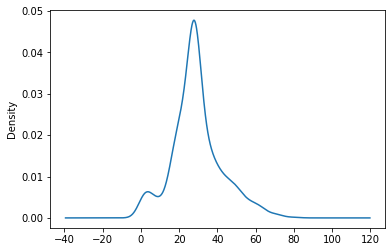

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Capturing missing values with a new feature

In [97]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [98]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)

In [99]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [100]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [133]:
df.head(10)  

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


# End of distribution imputation

In [115]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


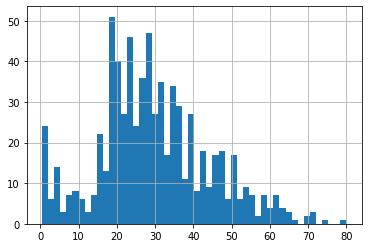

In [118]:
df['Age'].hist(bins = 50)

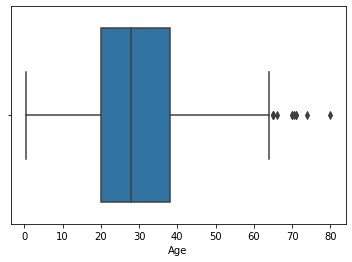

In [120]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [122]:
extreme = df['Age'].mean() + 3*df['Age'].std()

In [123]:
extreme

73.27860964406095

In [124]:
float("{:.2f}".format(extreme))

73.28

In [125]:
def impute_nan(df, variable, median, extreme):
    df[variable + '_end_dist'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [126]:
impute_nan(df, 'Age', df['Age'].median(), extreme)

In [127]:
df.head(15)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


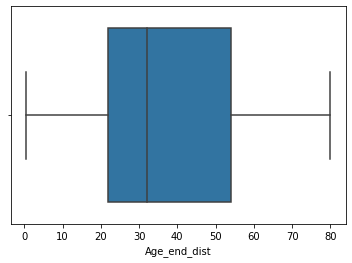

In [128]:
sns.boxplot('Age_end_dist', data = df) 

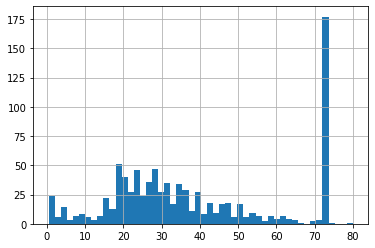

In [129]:
df['Age_end_dist'].hist(bins = 50)

# Arbitrary Imputation

In [135]:
df = pd.read_csv("titanic_train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [136]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

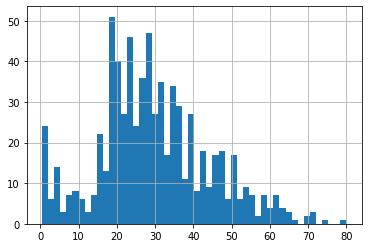

In [137]:
df['Age'].hist(bins = 50)

In [138]:
#max = 80 and min = 0 lets impute the missing values with them

In [139]:
def impute_nan(df, variable):
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_hundred'] = df[variable].fillna(100)
    df[variable].fillna(df[variable].median(), inplace = True)

In [141]:
impute_nan(df, 'Age')
df.head(15)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,28.0,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


# How to handle categorical missing values

#### 1.frequent category imputation

In [147]:
merc_url = 'https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mercedes.csv'
df = pd.read_csv(merc_url, usecols = ['ID', 'y', 'X0', 'X1'] )

In [158]:
df.head(15)

,ID,y,X0,X1,X0_freq
0,0,130.81,k,v,k
1,6,88.53,k,t,k
2,7,76.26,az,w,az
3,9,80.62,az,t,az
4,13,78.02,az,v,az
5,18,92.93,t,b,t
6,24,128.76,al,r,al
7,25,91.91,o,l,o
8,27,108.67,w,s,w
9,30,126.99,j,b,j


In [159]:
df.isnull().sum()

ID         0
y          0
X0         0
X1         0
X0_freq    0
dtype: int64

In [152]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
l      16
aw     16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [153]:
def impute_nan(df, variable, mode):
    df[variable + '_freq'] = df[variable].fillna(mode)

In [155]:
impute_nan(df, 'X0', df['X0'].mode()[0])

In [157]:
df.loc[df['X0'].isnull()].head(10)

,ID,y,X0,X1,X0_freq


In [160]:
#since i didnt get the dataset used in the video thats why not able to show here

# Encoding categorical vaiables

#### One hot encoding 

In [161]:
merc_url = 'https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mercedes.csv'


In [225]:
df_X0_encoded = pd.get_dummies(df['X0'], drop_first = True)
df_X0_encoded

,aa,ab,ac,ad,af,ai,aj,ak,al,am,...,q,r,s,t,u,v,w,x,y,z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### One hot encoding with many features

In [197]:
df = pd.read_csv(merc_url, usecols = ['X0', 'X1', 'X2', 'X3', 'X4'] )
df.head(15)

,X0,X1,X2,X3,X4
0,k,v,at,a,d
1,k,t,av,e,d
2,az,w,n,c,d
3,az,t,n,f,d
4,az,v,n,f,d
5,t,b,e,c,d
6,al,r,e,f,d
7,o,l,as,f,d
8,w,s,as,e,d
9,j,b,aq,c,d


In [176]:
import numpy as np
len(df['X0'].unique())

47

In [171]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4'], dtype='object')

In [172]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4


In [190]:
df['X0'].value_counts().head(10).index

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [218]:
frequnt_categories = {}
for column in ['X0', 'X1', 'X2']:
    print(column)
    frequnt_categories[column] = list(df[column].value_counts().head(10).index)

X0
X1
X2


In [219]:
print(type(frequnt_categories))

<class 'dict'>


In [220]:
print(frequnt_categories)

{'X0': ['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], 'X1': ['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], 'X2': ['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']}


In [221]:
def impute_nan(df, variable ):
    for category in frequnt_categories[variable]:
        df[category] = np.where(df[variable] == category, 1,0) 


for column in ['X0', 'X1', 'X2']:
    impute_nan(df, column)

In [222]:
df.head(15)


,X0,X1,X2,X3,X4,z,ak,y,ay,t,...,i,a,c,as,ae,ai,m,e,d,g
0,k,v,at,a,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,k,t,av,e,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,az,w,n,c,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,az,t,n,f,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,az,v,n,f,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,t,b,e,c,d,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
6,al,r,e,f,d,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,o,l,as,f,d,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,w,s,as,e,d,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,j,b,aq,c,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [223]:
df.shape

(4209, 31)

In [224]:
#WE SHOULD ENCODE ONLY ONE FEATURE IN A DATAFRAME, because categories are collapsing in multiple features